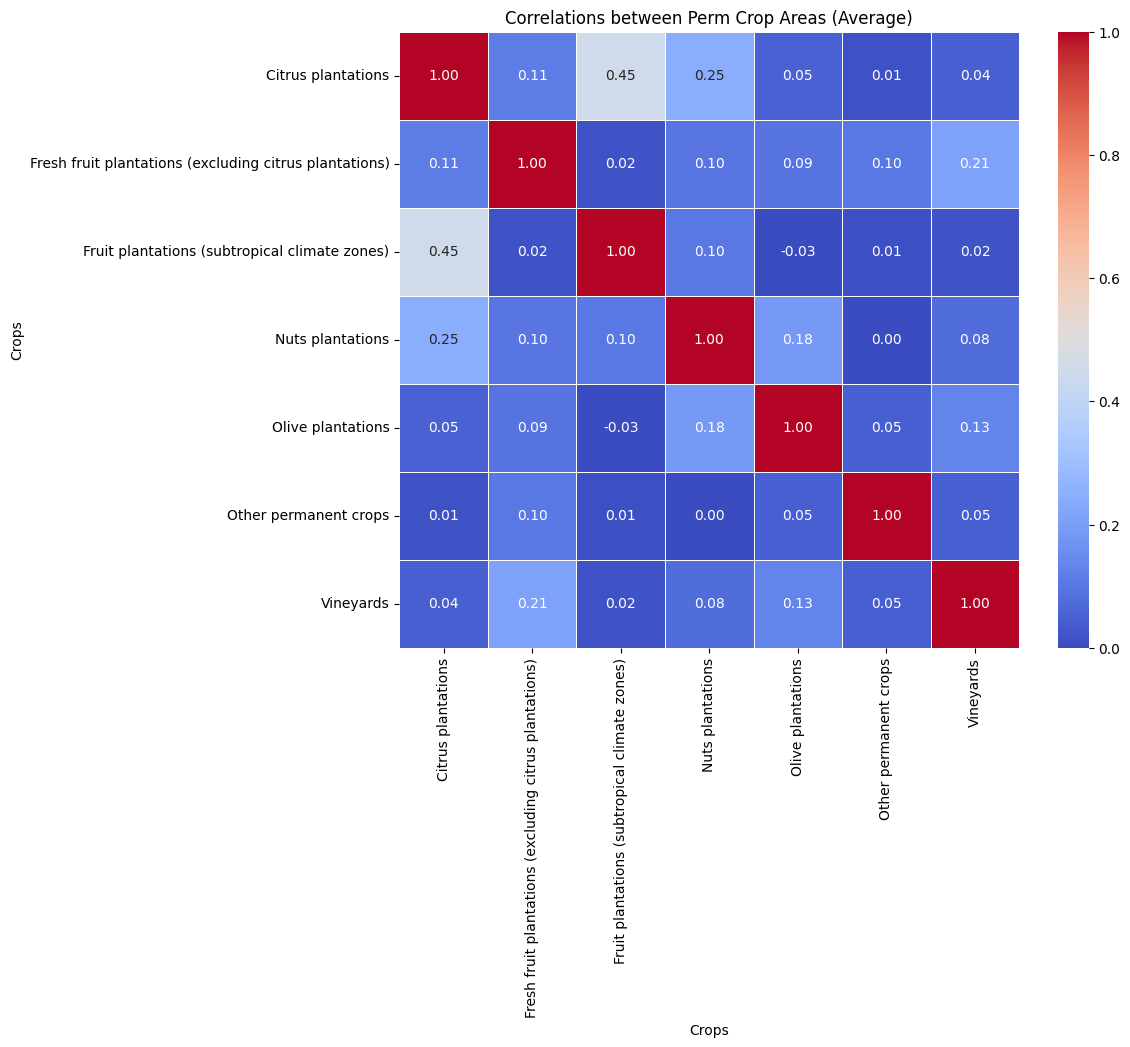

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from a CSV file
df = pd.read_csv('3_perm_crops.csv')

# Calculate the average of the area values for each region and crop
crop_data = df[['region_name', 'Perm_crop', 'Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].dropna()
crop_data['Average_Area'] = crop_data[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].mean(axis=1)

# Pivot the DataFrame to have crop areas as columns
crop_pivot = crop_data.pivot_table(index='region_name', columns='Perm_crop', values='Average_Area', aggfunc='sum')

# Calculate the correlations between crop areas
crop_correlations = crop_pivot.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crop_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=0, vmax=1)
plt.title('Correlations between Perm Crop Areas (Average)')
plt.xlabel('Crops')
plt.ylabel('Crops')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


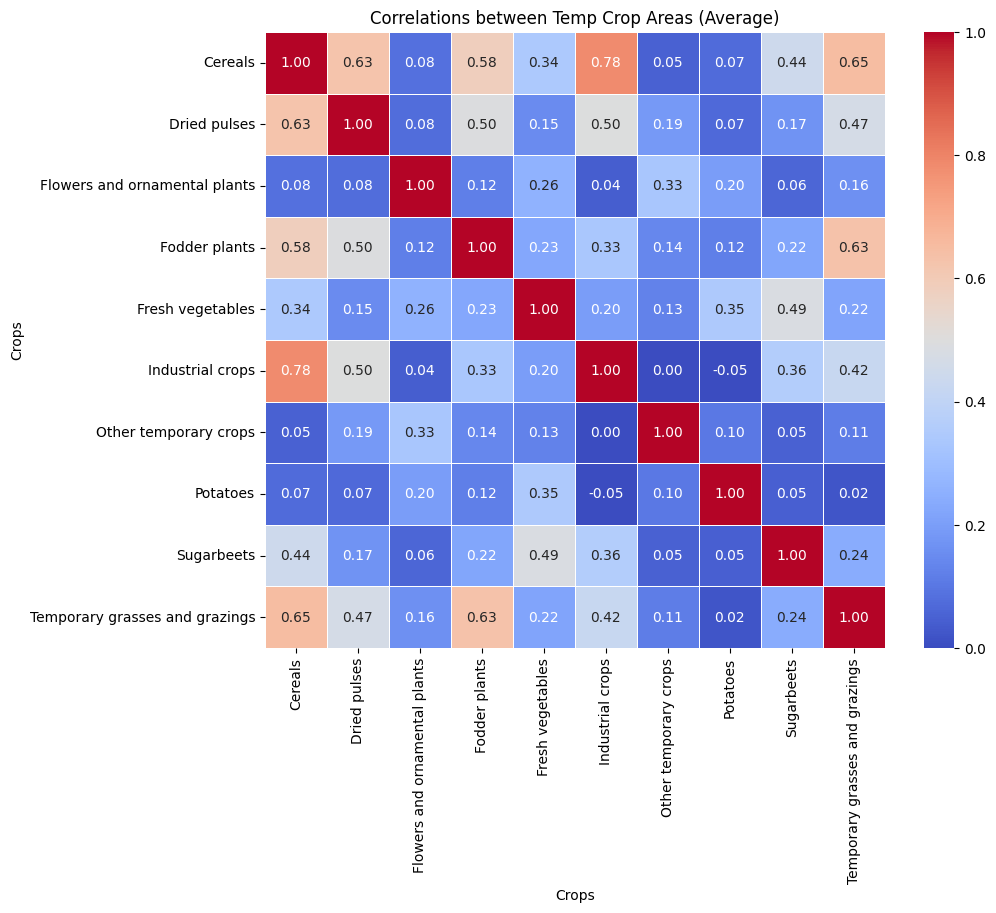

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from a CSV file
df = pd.read_csv('3_temp_crops.csv')

# Calculate the average of the area values for each region and crop
crop_data = df[['region_name', 'Temp_crop', 'Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].dropna()
crop_data['Average_Area'] = crop_data[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].mean(axis=1)

# Pivot the DataFrame to have crop areas as columns
crop_pivot = crop_data.pivot_table(index='region_name', columns='Temp_crop', values='Average_Area', aggfunc='sum')

# Calculate the correlations between crop areas
crop_correlations = crop_pivot.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crop_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=0, vmax=1)
plt.title('Correlations between Temp Crop Areas (Average)')
plt.xlabel('Crops')
plt.ylabel('Crops')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from a CSV file
df = pd.read_csv('3_temp_crops.csv')

# Calculate the average of the area values for each region and crop
crop_data = df[['region_name', 'Temp_crop', 'Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].dropna()
crop_data['Average_Area'] = crop_data[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].mean(axis=1)

# Pivot the DataFrame to have crop areas as columns
crop_pivot = crop_data.pivot_table(index='region_name', columns='Temp_crop', values='Average_Area', aggfunc='sum')

# Calculate the correlations between crop areas
crop_correlations = crop_pivot.corr()

# Remove self-correlations
crop_correlations = crop_correlations.mask(pd.DataFrame(np.eye(crop_correlations.shape[0], dtype=bool), crop_correlations.index, crop_correlations.columns))

# Sort the correlations in descending order
sorted_correlations = crop_correlations.unstack().sort_values(ascending=False)

# Drop NaN values
sorted_correlations = sorted_correlations.dropna()

# Create a DataFrame for the sorted correlations
correlation_table = pd.DataFrame(sorted_correlations, columns=['Correlation'])

# Drop duplicate values
correlation_table = correlation_table[~correlation_table['Correlation'].duplicated()]


# Display the table of sorted correlations
print(correlation_table)



                                                               Correlation
Temp_crop                      Temp_crop                                  
Industrial crops               Cereals                            0.783774
Cereals                        Temporary grasses and grazings     0.650681
Temporary grasses and grazings Fodder plants                      0.632311
Dried pulses                   Cereals                            0.627285
Cereals                        Fodder plants                      0.582915
Industrial crops               Dried pulses                       0.497745
Dried pulses                   Fodder plants                      0.495809
Sugarbeets                     Fresh vegetables                   0.488202
Temporary grasses and grazings Dried pulses                       0.465178
Cereals                        Sugarbeets                         0.444202
Industrial crops               Temporary grasses and grazings     0.421888
Sugarbeets               

In [40]:
# Load the data from a CSV file
df = pd.read_csv('3_perm_crops.csv')

# Calculate the average of the area values for each region and crop
crop_data = df[['region_name', 'Perm_crop', 'Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].dropna()
crop_data['Average_Area'] = crop_data[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].mean(axis=1)

# Pivot the DataFrame to have crop areas as columns
crop_pivot = crop_data.pivot_table(index='region_name', columns='Perm_crop', values='Average_Area', aggfunc='sum')

# Calculate the correlations between crop areas
crop_correlations = crop_pivot.corr()

# Remove self-correlations
crop_correlations = crop_correlations.mask(pd.DataFrame(np.eye(crop_correlations.shape[0], dtype=bool), crop_correlations.index, crop_correlations.columns))

# Sort the correlations in descending order
sorted_correlations = crop_correlations.unstack().sort_values(ascending=False)

# Drop NaN values
sorted_correlations = sorted_correlations.dropna()

# Create a DataFrame for the sorted correlations
correlation_table = pd.DataFrame(sorted_correlations, columns=['Correlation'])

# Drop duplicate values
correlation_table = correlation_table[~correlation_table['Correlation'].duplicated()]


# Display the table of sorted correlations
print(correlation_table)

                                                                                                       Correlation
Perm_crop                                          Perm_crop                                                      
Citrus plantations                                 Fruit plantations (subtropical climate zones)          0.452412
                                                   Nuts plantations                                       0.245960
Fresh fruit plantations (excluding citrus plant... Vineyards                                              0.207846
Nuts plantations                                   Olive plantations                                      0.184068
Vineyards                                          Olive plantations                                      0.129325
Citrus plantations                                 Fresh fruit plantations (excluding citrus plant...     0.111614
Fresh fruit plantations (excluding citrus plant... Other permanent crops        

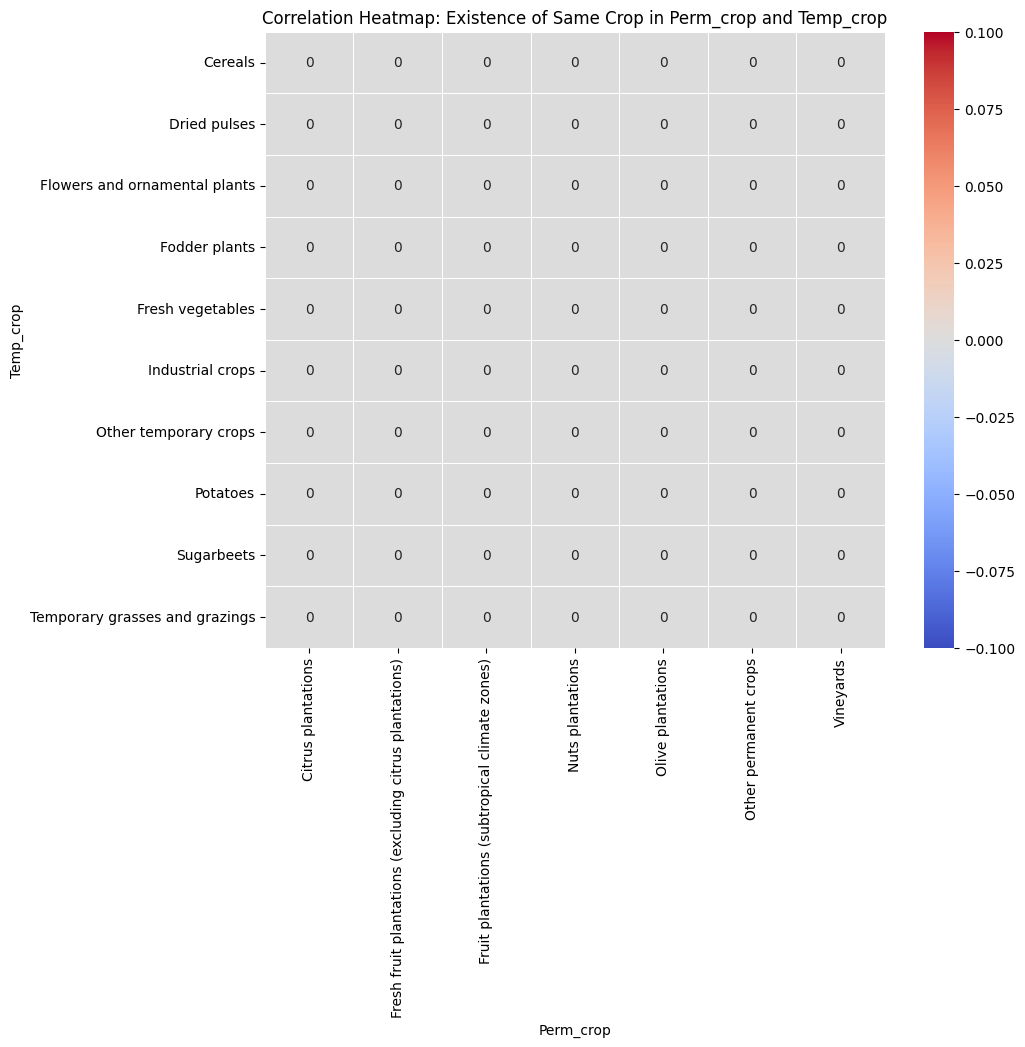

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the first CSV file
df1 = pd.read_csv('3_temp_crops.csv')

# Load the data from the second CSV file
df2 = pd.read_csv('3_perm_crops.csv')

# Extract the relevant columns from both dataframes
df1_subset = df1[['region_name', 'Temp_crop']]
df2_subset = df2[['region_name', 'Perm_crop']]

# Merge the two dataframes based on the 'region_name' column
merged_df = pd.merge(df1_subset, df2_subset, on='region_name', how='outer')

# Create a new column indicating if the region has the same crop in Temp_crop and Perm_crop
merged_df['Same_Crop'] = merged_df['Temp_crop'] == merged_df['Perm_crop']

# Pivot the dataframe to get the count of Same_Crop occurrences
pivot_table = merged_df.pivot_table(index='Temp_crop', columns='Perm_crop', values='Same_Crop', aggfunc='sum', fill_value=0)

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".0f", linewidths=0.5)
plt.title('Correlation Heatmap: Existence of Same Crop in Perm_crop and Temp_crop')
plt.xlabel('Perm_crop')
plt.ylabel('Temp_crop')
plt.show()


